In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from imblearn.over_sampling import RandomOverSampler

sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train_s3TEQDk.csv")
test = pd.read_csv("test_mSzZ8RL.csv")

In [3]:
train.shape,test.shape

((245725, 11), (105312, 10))

In [4]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [6]:
train.isnull().sum(),test.isnull().sum()

(ID                         0
 Gender                     0
 Age                        0
 Region_Code                0
 Occupation                 0
 Channel_Code               0
 Vintage                    0
 Credit_Product         29325
 Avg_Account_Balance        0
 Is_Active                  0
 Is_Lead                    0
 dtype: int64,
 ID                         0
 Gender                     0
 Age                        0
 Region_Code                0
 Occupation                 0
 Channel_Code               0
 Vintage                    0
 Credit_Product         12522
 Avg_Account_Balance        0
 Is_Active                  0
 dtype: int64)

In [7]:
train.nunique()

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [8]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
ID                     245725 non-null object
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null int64
Credit_Product         216400 non-null object
Avg_Account_Balance    245725 non-null int64
Is_Active              245725 non-null object
Is_Lead                245725 non-null int64
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [10]:
numerical_columns=['Age','Vintage']
categorical_columns=['Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']

In [11]:
train.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [12]:
test.Credit_Product.value_counts()

No     61608
Yes    31182
Name: Credit_Product, dtype: int64

In [13]:
train.Credit_Product.mode()[0]

'No'

In [14]:
test.Credit_Product.mode()[0]

'No'

In [15]:
train['Credit_Product']=train['Credit_Product'].fillna(train['Credit_Product'].mode()[0])

In [16]:
test['Credit_Product']=test['Credit_Product'].fillna(test['Credit_Product'].mode()[0])

In [17]:
train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [18]:
test.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [19]:
train.groupby(['Occupation','Is_Lead'])['ID'].count()

Occupation     Is_Lead
Entrepreneur   0            905
               1           1762
Other          0          52984
               1          17189
Salaried       0          60503
               1          11496
Self_Employed  0          73045
               1          27841
Name: ID, dtype: int64

In [20]:
train.Gender.value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

In [21]:
train['Gender'] = train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [22]:
train.Gender.value_counts()

1    134197
0    111528
Name: Gender, dtype: int64

In [23]:
test['Gender'] = test['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [24]:
test['Gender'].value_counts()

1    57705
0    47607
Name: Gender, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
for i in categorical_columns:
    train[i] = le.fit_transform(train[i])

In [27]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,18,1,2,43,0,1045696,0,0
1,IDD62UNG,0,30,27,2,0,32,0,581988,0,0
2,HD3DSEMC,0,56,18,3,2,26,0,1484315,1,0
3,BF3NC7KV,1,34,20,2,0,19,0,470454,0,0
4,TEASRWXV,0,30,32,2,0,33,0,886787,0,0


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
ID                     245725 non-null object
Gender                 245725 non-null int32
Age                    245725 non-null int64
Region_Code            245725 non-null int32
Occupation             245725 non-null int32
Channel_Code           245725 non-null int32
Vintage                245725 non-null int64
Credit_Product         245725 non-null int32
Avg_Account_Balance    245725 non-null int64
Is_Active              245725 non-null int32
Is_Lead                245725 non-null int64
dtypes: int32(6), int64(4), object(1)
memory usage: 15.0+ MB


In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
train[numerical_columns] = ss.fit_transform(train[numerical_columns])


mm = MinMaxScaler()
train[['Avg_Account_Balance']] = mm.fit_transform(train[['Avg_Account_Balance']])

In [30]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,1.965365,18,1,2,-0.122373,0,0.099205,0,0
1,IDD62UNG,0,-0.934429,27,2,0,-0.462372,0,0.054321,0,0
2,HD3DSEMC,0,0.818935,18,3,2,-0.647825,0,0.141660,1,0
3,BF3NC7KV,1,-0.664680,20,2,0,-0.864188,0,0.043525,0,0
4,TEASRWXV,0,-0.934429,32,2,0,-0.431463,0,0.083823,0,0


In [32]:
train = pd.get_dummies(train, columns=['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active'])

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 54 columns):
ID                     245725 non-null object
Age                    245725 non-null float64
Vintage                245725 non-null float64
Avg_Account_Balance    245725 non-null float64
Is_Lead                245725 non-null int64
Gender_0               245725 non-null uint8
Gender_1               245725 non-null uint8
Region_Code_0          245725 non-null uint8
Region_Code_1          245725 non-null uint8
Region_Code_2          245725 non-null uint8
Region_Code_3          245725 non-null uint8
Region_Code_4          245725 non-null uint8
Region_Code_5          245725 non-null uint8
Region_Code_6          245725 non-null uint8
Region_Code_7          245725 non-null uint8
Region_Code_8          245725 non-null uint8
Region_Code_9          245725 non-null uint8
Region_Code_10         245725 non-null uint8
Region_Code_11         245725 non-null uint8
Region_Code_12         2457

In [34]:
train.head()

,ID,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_0,Gender_1,Region_Code_0,Region_Code_1,Region_Code_2,...,Occupation_2,Occupation_3,Channel_Code_0,Channel_Code_1,Channel_Code_2,Channel_Code_3,Credit_Product_0,Credit_Product_1,Is_Active_0,Is_Active_1
0,NNVBBKZB,1.965365,-0.122373,0.099205,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,IDD62UNG,-0.934429,-0.462372,0.054321,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,HD3DSEMC,0.818935,-0.647825,0.141660,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
3,BF3NC7KV,-0.664680,-0.864188,0.043525,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
4,TEASRWXV,-0.934429,-0.431463,0.083823,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0


In [35]:
test[numerical_columns] = ss.fit_transform(test[numerical_columns])


mm = MinMaxScaler()
test[['Avg_Account_Balance']] = mm.fit_transform(test[['Avg_Account_Balance']])

In [36]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,1,-0.999878,RG254,Other,X1,-0.676804,Yes,0.072805,No
1,CCMEWNKY,1,-0.058563,RG268,Other,X2,0.066841,No,0.091333,No
2,VK3KGA9M,1,-0.865404,RG270,Salaried,X1,-1.017641,No,0.019558,No
3,TT8RPZVC,1,-0.999878,RG272,Other,X1,-0.428922,No,0.085520,No
4,SHQZEYTZ,0,-0.999878,RG270,Other,X1,-0.862715,No,0.064179,No


In [37]:
for i in categorical_columns:
    test[i] = le.fit_transform(test[i])

In [38]:
test = pd.get_dummies(test, columns=['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active'])

In [39]:
test.head()

,ID,Age,Vintage,Avg_Account_Balance,Gender_0,Gender_1,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,...,Occupation_2,Occupation_3,Channel_Code_0,Channel_Code_1,Channel_Code_2,Channel_Code_3,Credit_Product_0,Credit_Product_1,Is_Active_0,Is_Active_1
0,VBENBARO,-0.999878,-0.676804,0.072805,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,CCMEWNKY,-0.058563,0.066841,0.091333,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,VK3KGA9M,-0.865404,-1.017641,0.019558,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
3,TT8RPZVC,-0.999878,-0.428922,0.085520,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,SHQZEYTZ,-0.999878,-0.862715,0.064179,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [40]:
train.shape,test.shape

((245725, 54), (105312, 53))

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score as f1,roc_auc_score

In [42]:
X= train.drop(columns = ['ID','Is_Lead'], axis=1)
y= train['Is_Lead']

In [43]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [44]:
features= X.columns
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_pred = LR.predict(X_valid)

In [46]:
roc_auc_score(y_valid,y_pred)

0.5497916406856556

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#from catboost import CatBoostClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
#import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve,auc, roc_curve, recall_score, classification_report

In [54]:
#!pip install hyperopt

You should consider upgrading via the 'c:\users\jaydeep\anaconda3\python.exe -m pip install --upgrade pip' command.


In [55]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [56]:
space={ 'max_depth': hp.quniform("max_depth", 3,18,1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 300,
        'seed': 0
      }

In [62]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_valid, y_valid)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_valid)
    y_score = clf.predict_proba(X_valid)[:,1]
    accuracy = accuracy_score(y_valid, pred>0.5)
    Roc_Auc_Score = roc_auc_score(y_valid, y_score)
    print ("ROC-AUC Score:",Roc_Auc_Score)
    print ("SCORE:", accuracy)
    return {'loss': -Roc_Auc_Score, 'status': STATUS_OK }

In [58]:
trials = Trials()

In [63]:
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

ROC-AUC Score:                                                                                                         
0.732083883066287                                                                                                      
SCORE:                                                                                                                 
0.7621935090039679                                                                                                     
ROC-AUC Score:                                                                                                         
0.7323667725616017                                                                                                     
SCORE:                                                                                                                 
0.7621935090039679                                                                                                     
ROC-AUC Score:                          

ROC-AUC Score:                                                                                                         
0.7323449586773833                                                                                                     
SCORE:                                                                                                                 
0.7621935090039679                                                                                                     
ROC-AUC Score:                                                                                                         
0.7324583705450856                                                                                                     
SCORE:                                                                                                                 
0.7621935090039679                                                                                                     
ROC-AUC Score:                          

ROC-AUC Score:                                                                                                         
0.7331254968943329                                                                                                     
SCORE:                                                                                                                 
0.7621935090039679                                                                                                     
ROC-AUC Score:                                                                                                         
0.7331193612753988                                                                                                     
SCORE:                                                                                                                 
0.7621935090039679                                                                                                     
ROC-AUC Score:                          

ROC-AUC Score:                                                                                                         
0.7321681347539808                                                                                                     
SCORE:                                                                                                                 
0.7621935090039679                                                                                                     
ROC-AUC Score:                                                                                                         
0.7324926349844046                                                                                                     
SCORE:                                                                                                                 
0.7621935090039679                                                                                                     
ROC-AUC Score:                          

ROC-AUC Score:                                                                                                         
0.7323483554254677                                                                                                     
SCORE:                                                                                                                 
0.7621935090039679                                                                                                     
ROC-AUC Score:                                                                                                         
0.7326631862311157                                                                                                     
SCORE:                                                                                                                 
0.7621935090039679                                                                                                     
ROC-AUC Score:                          

ROC-AUC Score:                                                                                                         
0.7328307758881214                                                                                                     
SCORE:                                                                                                                 
0.7621935090039679                                                                                                     
ROC-AUC Score:                                                                                                         
0.7326158887412273                                                                                                     
SCORE:                                                                                                                 
0.7621935090039679                                                                                                     
ROC-AUC Score:                          

In [64]:
print(best_hyperparams)

{'colsample_bytree': 0.852063958365646, 'gamma': 1.8655266824443149, 'max_depth': 10.0, 'min_child_weight': 6.0, 'reg_alpha': 40.0, 'reg_lambda': 0.5732629460346312}


In [71]:
xgb_model=xgb.XGBClassifier(n_estimators = space['n_estimators'],colsample_bytree= 0.852063958365646, gamma= 1.8655266824443149, max_depth= 10, min_child_weight= 6.0,reg_alpha= 40.0, reg_lambda= 0.5732629460346312)

In [72]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.852063958365646,
              gamma=1.8655266824443149, learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=6.0, missing=None,
              n_estimators=300, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=40.0,
              reg_lambda=0.5732629460346312, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [73]:
xg_pred=xgb_model.predict(X_valid)

In [74]:
roc_auc_score(y_valid,xg_pred)

0.6153026160127328

In [75]:
submission = pd.read_csv('sample_submission_eyYijxG.csv')

In [76]:
submission['ID']=test['ID']

In [78]:
test1=test.drop(['ID'],axis=1)

In [79]:
test1.head()

,Age,Vintage,Avg_Account_Balance,Gender_0,Gender_1,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,...,Occupation_2,Occupation_3,Channel_Code_0,Channel_Code_1,Channel_Code_2,Channel_Code_3,Credit_Product_0,Credit_Product_1,Is_Active_0,Is_Active_1
0,-0.999878,-0.676804,0.072805,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
1,-0.058563,0.066841,0.091333,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,-0.865404,-1.017641,0.019558,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
3,-0.999878,-0.428922,0.085520,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,-0.999878,-0.862715,0.064179,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [80]:
final_predictions = LR.predict(test1)

In [94]:
submission['Is_Lead'] = final_predictions

In [95]:
submission.to_csv('my_xgb.csv', index=False)

In [82]:
SEED = 1970

In [83]:
XGB_model_l = xgb.XGBClassifier(random_state = SEED, max_depth = 8, 
                            n_estimators = 30000, 
                            reg_lambda = 1.2, reg_alpha = 1.2, 
                            min_child_weight = 1, 
                            objective = 'binary:logistic',
                            learning_rate = 0.15, gamma = 0.3, colsample_bytree = 0.5, eval_metric = 'auc')

XGB_model_l.fit(X_train, y_train,
                eval_set = [(X_valid, y_valid)],
                early_stopping_rounds=50,verbose = 1000)

[0]	validation_0-auc:0.725219
Will train until validation_0-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[75]	validation_0-auc:0.789243



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='auc',
              gamma=0.3, learning_rate=0.15, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=30000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1970,
              reg_alpha=1.2, reg_lambda=1.2, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [84]:
XGB_preds_l = XGB_model_l.predict_proba(X_valid)

In [85]:
XGB_score_l = roc_auc_score(y_valid, XGB_preds_l[:,1])

In [86]:
XGB_class_l = XGB_model_l.predict(X_valid)

In [90]:
import sklearn

In [91]:
def plot_ROC(fpr, tpr, m_name):
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver operating characteristic for %s'%m_name, fontsize=20)
    plt.legend(loc="lower right", fontsize=16)
    plt.show()

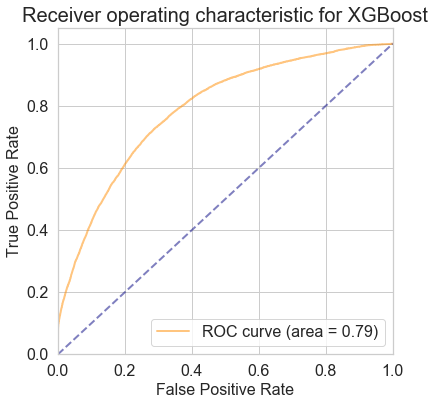

ROC AUC score for XGBoost model with over-sampling + 2 new features: 0.7892
F1 score: 0.3886


NameError: name 'skplt' is not defined

In [92]:
(fpr, tpr, thresholds) = roc_curve(y_valid, XGB_preds_l[:,1])
plot_ROC(fpr, tpr,'XGBoost')

print('ROC AUC score for XGBoost model with over-sampling + 2 new features: %.4f'%XGB_score_l)
print('F1 score: %0.4f'%f1_score(y_valid, XGB_class_l))
skplt.metrics.plot_confusion_matrix(y_valid, XGB_class_l,
        figsize=(8,8))

xgb.plot_importance(XGB_model_l)

In [93]:
sub=XGB_model_l.predict(test1)

In [96]:
submission['Is_Lead'] = sub

In [97]:
submission.to_csv('my_xgb2.csv', index=False)